# *AutoSklearn* para cálculo de resistência de concreto

Nesse projeto irei utilizar a biblioteca *Auto Sklearn* para modelagem de dados de concreto. Assim como em outros trabalhos, a vantagem do *Auto Machine Learning* é a automatização do processo de modelagem, cabendo a biblioteca definir qual o melhor modelo. 

O nome dessa biblioteca é autoexplicativo, então entende-se que ela utiliza os modelos de regressão e classificação usados na biblioteca *Scikit-Learn*. A *Auto Sklearn* faz a seleção de algoritmo e ajuste de hiperparâmetros. Ela, ainda, aproveita as vantagens recentes na otimização Bayesiana , meta-aprendizado e construção de conjuntos. 

Exemplos e como a biblioteca é usada em outros projetos podem ser encontrado [aqui](https://automl.github.io/auto-sklearn/master/index.html).

## Dados
Os dados tratam de componentes do concreto e podem ser obtidos [aqui](https://www.kaggle.com/prathamtripathi/regression-with-neural-networking).

## Instalação das bibliotecas

In [2]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn
!pip install dask[complete] distributed --upgrade
!pip install "dask[distributed]" --upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (8,696 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpackin

## Importação das bibliotecas

In [1]:
import sklearn.datasets
import sklearn.metrics
import autosklearn.regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [2]:
plt.style.use('ggplot')

## Importação dos dados

In [11]:
concreto = pd.read_csv('concrete_data.csv')

## Análise exploratória dos dados

Primeiras linhas da base de dados.

In [12]:
concreto.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


últimas linhas da base de dados.

In [13]:
concreto.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


Nas informações sobre a base de dados, vemos que com exceção da varipavel *Age*, todas as variáveis são do tipo *float64*.

In [14]:
concreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Dimensão da nossa base de dados: 1030 observações e 9 colunas.

In [15]:
concreto.shape

(1030, 9)

Tabela estatística da base de dados.

In [16]:
concreto.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Correlação entre as variáveis.

In [17]:
concreto.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Correlação de *Spearman*.

In [18]:
concreto.corr('spearman')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640,0.477614
Blast Furnace Slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581,0.164105
Fly Ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801,-0.077830
Water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942,-0.308414
Superplasticizer,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525,0.347786
Coarse Aggregate,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928,-0.183542
Fine Aggregate,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362,-0.179962
Age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000,0.596028
Strength,0.477614,0.164105,-0.077830,-0.308414,0.347786,-0.183542,-0.179962,0.596028,1.000000


### Análise Gráfica

#### Gráfico de regressão

Conforme os gráfico de regressão gerados abaixo, as variáveis que apresentam ter uma relação linear positiva com a variável *target* *Strength* é *Cement* e *Superplasticizer*.


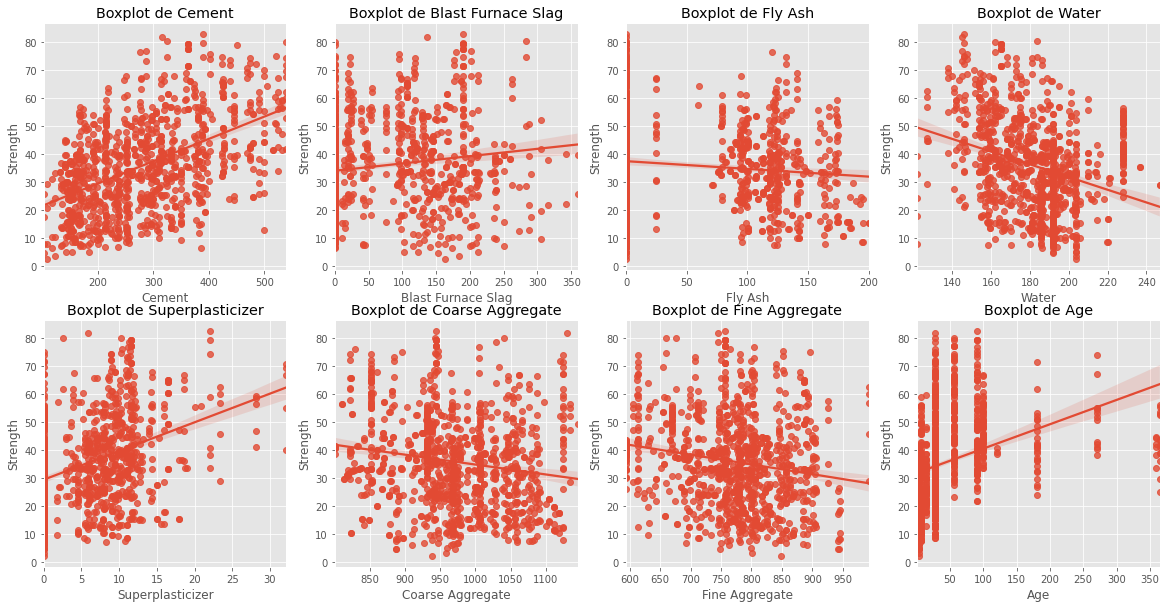

In [19]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
ax[0][0].title.set_text('Boxplot de Cement')
ax[0][1].title.set_text('Boxplot de Blast Furnace Slag')
ax[0][2].title.set_text('Boxplot de Fly Ash')
ax[0][3].title.set_text('Boxplot de Water')
ax[1][0].title.set_text('Boxplot de Superplasticizer')
ax[1][1].title.set_text('Boxplot de Coarse Aggregate')
ax[1][2].title.set_text('Boxplot de Fine Aggregate')
ax[1][3].title.set_text('Boxplot de Age')
sns.regplot(x='Cement', y='Strength', data=concreto, ax=ax[0][0])
sns.regplot(x='Blast Furnace Slag', y='Strength', data=concreto, ax=ax[0][1])
sns.regplot(x='Fly Ash', y='Strength',data=concreto, ax=ax[0][2])
sns.regplot(x='Water', y='Strength',data=concreto, ax=ax[0][3])
sns.regplot(x='Superplasticizer', y='Strength',data=concreto, ax=ax[1][0])
sns.regplot(x='Coarse Aggregate', y='Strength',data=concreto, ax=ax[1][1])
sns.regplot(x='Fine Aggregate', y='Strength',data=concreto, ax=ax[1][2])
sns.regplot(x='Age', y='Strength',data=concreto, ax=ax[1][3])

#### Histograma das variáveis

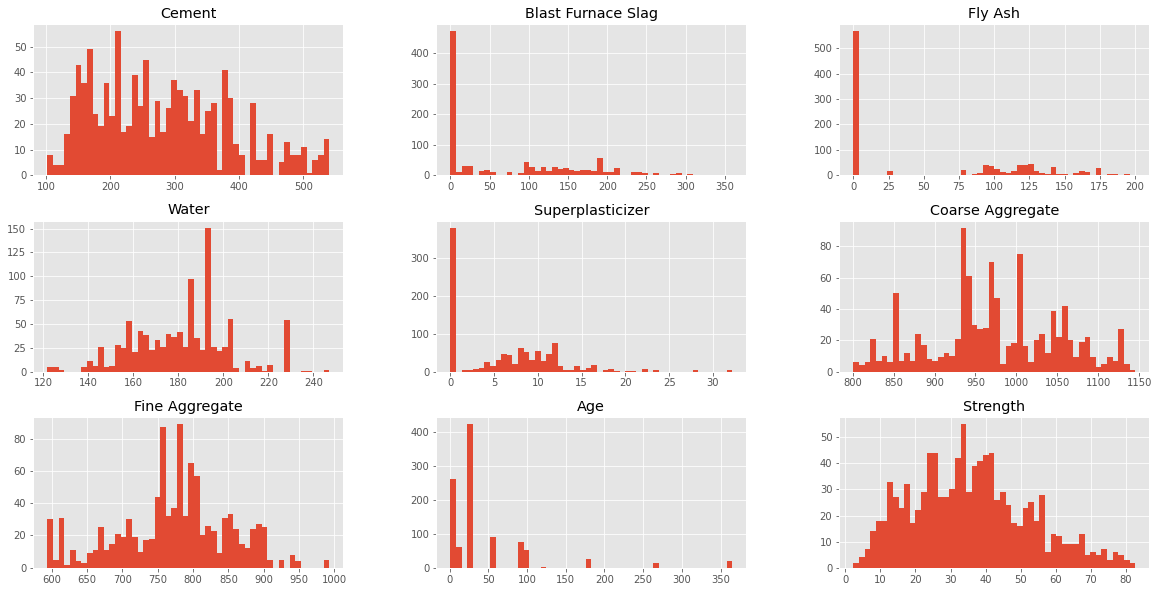

In [20]:
concreto.hist(figsize=(20,10), bins=50);

#### *Boxplot* das variáveis

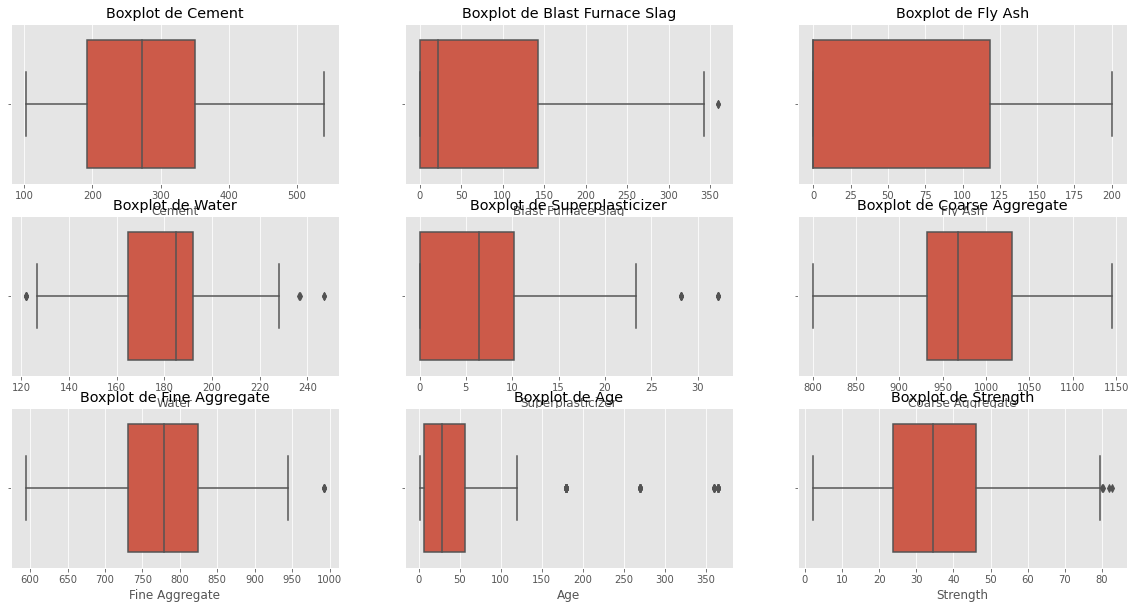

In [21]:
fig, ax = plt.subplots(3,3,figsize=(20,10))
ax[0][0].title.set_text('Boxplot de Cement')
ax[0][1].title.set_text('Boxplot de Blast Furnace Slag')
ax[0][2].title.set_text('Boxplot de Fly Ash')
ax[1][0].title.set_text('Boxplot de Water')
ax[1][1].title.set_text('Boxplot de Superplasticizer')
ax[1][2].title.set_text('Boxplot de Coarse Aggregate')
ax[2][0].title.set_text('Boxplot de Fine Aggregate')
ax[2][1].title.set_text('Boxplot de Age')
ax[2][2].title.set_text('Boxplot de Strength')
sns.boxplot(x='Cement', data=concreto, ax=ax[0][0])
sns.boxplot(x='Blast Furnace Slag', data=concreto, ax=ax[0][1])
sns.boxplot(x='Fly Ash', data=concreto, ax=ax[0][2])
sns.boxplot(x='Water', data=concreto, ax=ax[1][0])
sns.boxplot(x='Superplasticizer', data=concreto, ax=ax[1][1])
sns.boxplot(x='Coarse Aggregate', data=concreto, ax=ax[1][2])
sns.boxplot(x='Fine Aggregate', data=concreto, ax=ax[2][0])
sns.boxplot(x='Age', data=concreto, ax=ax[2][1])
sns.boxplot(x='Strength', data=concreto, ax=ax[2][2]);

## Modelagem com *Auto Sklearn*

### Separando as variáveis de treino e de teste

Nosso *y* será nossa variável alvo *Strength* e as demais variáveis serão nossas preditoras, que nomeremos de *X*.

In [22]:
y = concreto['Strength']
#teste :X = concreto[['Cement','Superplasticizer','Age']]
X = concreto.drop('Strength', axis=1)

Sepatrando os dados de treino e de teste.

In [23]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 42)

Na modelagem com a *Auto Sklearn* irei gerar um modelo com 1 minuto (por padrão esse processo dura uma hora ou 3600 segundos).

In [24]:
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=60)
automl.fit(pd.DataFrame(X_treino), pd.DataFrame(y_treino), dataset_name='concreto')

AutoSklearnRegressor(per_run_time_limit=6, time_left_for_this_task=60)

Imprimindo os modelos.

In [25]:
print(automl.show_models())

[(0.480000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7010465420634562, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.19032833128592427, 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'ward', 'feature_preprocessor:feature_agglomeration:n_clusters': 31, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criteri

Gerando as previsões com o modelo.

In [26]:
predictions = automl.predict(pd.DataFrame(X_teste))

### Métricas de avaliação do modelo

Podemos ver que o modelo possui um $R^2$ bem alto, próximo de 90% e que algumas métricas de avaliação estão bem próximas de zero.

In [27]:
print("R2 :", round(sklearn.metrics.r2_score(y_teste, predictions)*100,3),'%')
print("Erro médio absoluto :", sklearn.metrics.mean_absolute_error(y_teste, predictions))
print("Erro médio percentual absoluto :", sklearn.metrics.mean_absolute_percentage_error(y_teste, predictions))
print("Erro médio quadrado :", sklearn.metrics.mean_squared_error(y_teste, predictions))
print("Erro médio logarítmico quadrado :", sklearn.metrics.mean_squared_log_error(y_teste, predictions))
print("Erro mediano absoluto :", sklearn.metrics.median_absolute_error(y_teste, predictions))

R2 : 89.803 %
Erro médio absoluto : 3.907485038152961
Erro médio percentual absoluto : 0.13186784887581904
Erro médio quadrado : 27.62182916624647
Erro médio logarítmico quadrado : 0.026504404779111895
Erro mediano absoluto : 2.848742341995239


### Comparando previsões e resultado real

Transformando as previsões e os valores reais em listas.

In [28]:
y_list = y_teste.tolist()
pred = predictions.tolist()

Plotando os 60 primeiro resultados.

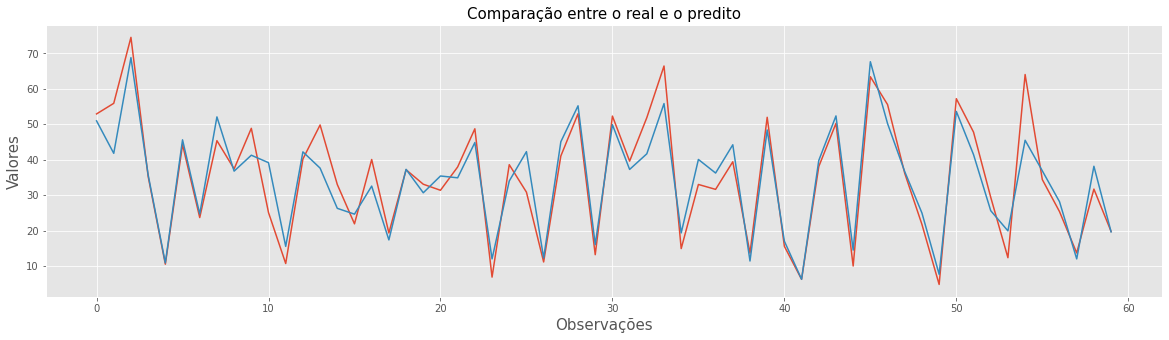

In [29]:
plt.figure(figsize=(20,5))
plt.title("Comparação entre o real e o predito", size=15)
plt.xlabel('Observações', size=15)
plt.ylabel('Valores',size=15)
plt.plot(y_list[:60])
plt.plot(pred[:60]);

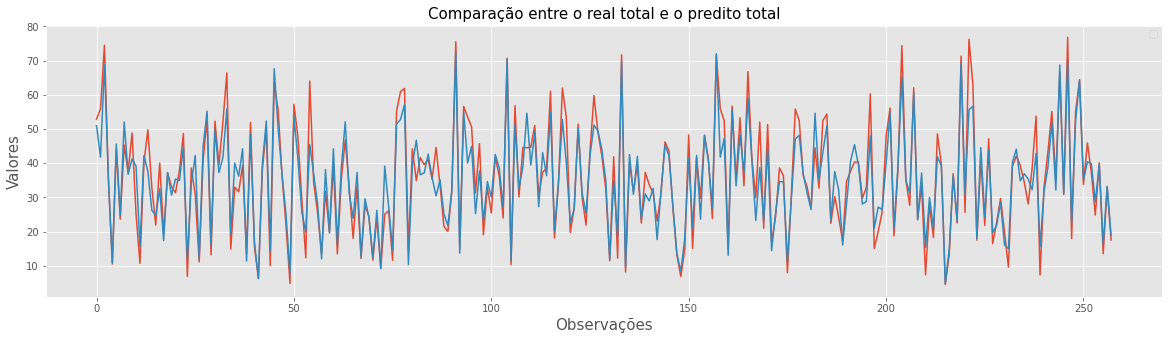

In [34]:
plt.figure(figsize=(20,5))
plt.title("Comparação entre o real total e o predito total", size=15)
plt.xlabel('Observações', size=15)
plt.ylabel('Valores',size=15)
plt.legend(['Valores reais','Valores preditos'])
plt.plot(y_list)
plt.plot(pred);

Comparando as estatísticas descritivas do real e do predito, vemos que as estatísticas estão bem próximas umas das outras.

In [35]:
display(pd.DataFrame(y_teste).describe().T)
display(pd.DataFrame(pred, columns={'Predict'}).describe().T)


,count,mean,std,min,25%,50%,75%,max
Strength,258.0,35.584806,16.49016,4.57,23.2325,34.835,46.6575,76.8


,count,mean,std,min,25%,50%,75%,max
Predict,258.0,34.987447,14.319967,4.777823,24.665144,35.410823,43.23704,72.589703


## Conclusão

Nesse pequeno trabalho utilizei essa biblioteca e vemos que apenas um minuto consegui gerar um modelo de regressão com bom poder preditivo.